# Series de tiempo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from scipy import stats

1. Leer el dataset desde el github.

In [4]:
path = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv"
df = pd.read_csv(f"{path}")

2. Definir como indice la columna time.

In [5]:
df.index = pd.to_datetime(df.time)

df = df.drop(columns=['Unnamed: 0', 'time'])

df

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,
2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075


3. Obtenga información del data frame.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                5000 non-null   float64
 1   high                5000 non-null   float64
 2   low                 5000 non-null   float64
 3   close               5000 non-null   float64
 4   tick_volume         5000 non-null   int64  
 5   spread              5000 non-null   int64  
 6   real_volume         5000 non-null   int64  
 7   MeanCloseOpen       5000 non-null   float64
 8   Diff_Close          5000 non-null   float64
 9   Diff_Open           5000 non-null   float64
 10  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 468.8 KB


In [7]:
df.describe()

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.043891,1.044815,1.042991,1.043906,3690.249400,8.981600,0.0,1.043898,0.000012,0.000012,0.000012
std,0.041135,0.040991,0.041263,0.041135,2800.488505,5.785115,0.0,0.041129,0.001400,0.001404,0.000978
min,0.953910,0.955930,0.953570,0.953910,85.000000,0.000000,0.0,0.954735,-0.013970,-0.014010,-0.007260
25%,1.002718,1.003507,1.001715,1.002705,1738.750000,8.000000,0.0,1.002648,-0.000580,-0.000600,-0.000425
50%,1.055670,1.056795,1.054960,1.055700,2999.500000,8.000000,0.0,1.055712,-0.000005,0.000000,0.000005
75%,1.078940,1.079582,1.078222,1.078947,4861.000000,8.000000,0.0,1.078955,0.000620,0.000612,0.000430
max,1.108470,1.109530,1.108050,1.108500,23708.000000,183.000000,0.0,1.108280,0.017340,0.017420,0.010780


4. Determine si hay null, nan en el data frame.

In [8]:
df.isnull().sum()

open                  0
high                  0
low                   0
close                 0
tick_volume           0
spread                0
real_volume           0
MeanCloseOpen         0
Diff_Close            0
Diff_Open             0
Diff_MeanCloseOpen    0
dtype: int64

El dataframe no tiene valores nulos.

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

In [9]:
df.columns

Index(['open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume',
       'MeanCloseOpen', 'Diff_Close', 'Diff_Open', 'Diff_MeanCloseOpen'],
      dtype='object')

In [10]:
new_columns = []
for col in df.columns:
    # Dividir el nombre si hay '_' y poner mayuscula a la letra inicial
    components = col.split('_')
    new_column_name = ''.join([x.title() for x in components])
    new_columns.append(new_column_name)

df.columns = new_columns

df.columns

Index(['Open', 'High', 'Low', 'Close', 'TickVolume', 'Spread', 'RealVolume',
       'Meancloseopen', 'DiffClose', 'DiffOpen', 'DiffMeancloseopen'],
      dtype='object')

In [11]:
df_new = df[['Close']]

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.


In [12]:
df_new['DiffPrice'] = df_new['Close'].diff()
df_new = df_new.dropna()

df_new

/tmp/ipykernel_4689/86682613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['DiffPrice'] = df_new['Close'].diff()


,Close,DiffPrice
time,,
2022-07-25 14:00:00,1.02299,-0.00046
2022-07-25 15:00:00,1.02457,0.00158
2022-07-25 16:00:00,1.02485,0.00028
2022-07-25 17:00:00,1.02181,-0.00304
2022-07-25 18:00:00,1.02099,-0.00082
...,...,...
2023-05-12 19:00:00,1.08514,-0.00038
2023-05-12 20:00:00,1.08546,0.00032
2023-05-12 21:00:00,1.08531,-0.00015


- Para la nueva columna construya un histograma de los datos.

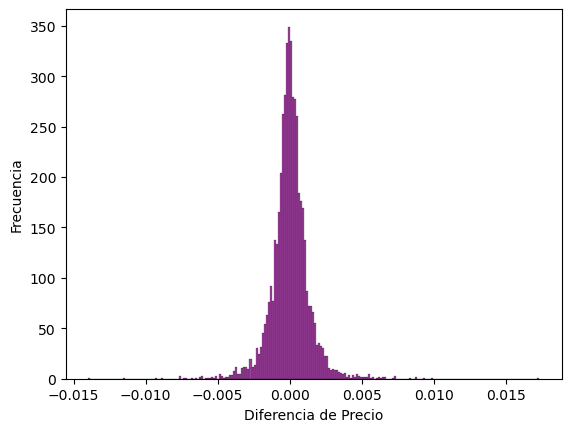

In [13]:
sns.histplot(df_new['DiffPrice'], color='purple')

plt.xlabel('Diferencia de Precio')
plt.ylabel('Frecuencia')

plt.show()

- Determine la mejor distribucion estadística que se ajusta al histograma anterior.

In [2]:
pip install fitter -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
from fitter import Fitter, get_common_distributions, get_distributions

2024-10-01 06:49:08.151 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted beta distribution with error=106676.111621)
2024-10-01 06:49:08.246 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=106744.023571)
2024-10-01 06:49:08.455 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=923360.482403)
2024-10-01 06:49:08.463 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=106500.661168)
2024-10-01 06:49:08.650 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted burr distribution with error=721804.561088)


(14613.527947910232,
 27360.991772190286,
 -0.20964563672636735,
 0.6022017125608812)

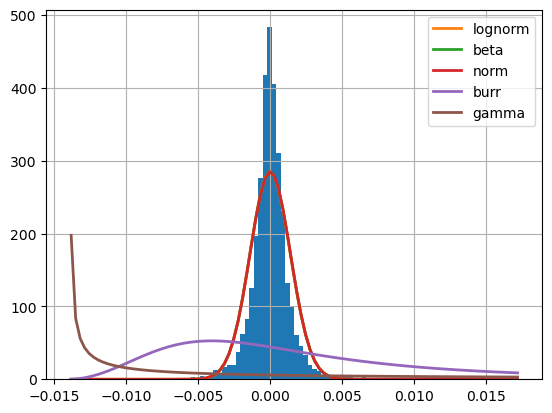

In [15]:
f = Fitter(df_new.DiffPrice,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
# Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
# Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

La distribución que mejor se ajusta al histograma anterior es la normal.

7. Para el data frame, seleccionemos solo los datos del 2023.


In [16]:
df_2023 = df_new.loc['2023']
df_2023

,Close,DiffPrice
time,,
2023-01-02 00:00:00,1.06796,-0.00200
2023-01-02 01:00:00,1.06965,0.00169
2023-01-02 02:00:00,1.07058,0.00093
2023-01-02 03:00:00,1.06896,-0.00162
2023-01-02 04:00:00,1.06880,-0.00016
...,...,...
2023-05-12 19:00:00,1.08514,-0.00038
2023-05-12 20:00:00,1.08546,0.00032
2023-05-12 21:00:00,1.08531,-0.00015


8. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

In [17]:
promedio_15_dias = df_2023.groupby(pd.Grouper(freq='15D')).mean()
promedio_15_dias

,Close,DiffPrice
time,,
2023-01-02,1.069361,0.000047
2023-01-17,1.085565,0.000015
2023-02-01,1.077679,-0.000066
2023-02-16,1.063150,-0.000034
2023-03-03,1.063186,0.000026
2023-03-18,1.080936,0.000074
2023-04-02,1.093090,0.000063
2023-04-17,1.099084,-0.000006
2023-05-02,1.098889,-0.000059


In [18]:
promedio_1_semana = df_2023.groupby(pd.Grouper(freq='1W')).mean()
promedio_1_semana

,Close,DiffPrice
time,,
2023-01-08,1.059972,-0.000047
2023-01-15,1.076002,0.000156
2023-01-22,1.082041,0.000020
2023-01-29,1.088414,0.000010
2023-02-05,1.089281,-0.000062
2023-02-12,1.073363,-0.000097
2023-02-19,1.069648,0.000014
2023-02-26,1.063374,-0.000124
2023-03-05,1.060854,0.000073


In [19]:
promedio_1_mes = df_2023.groupby(pd.Grouper(freq='1ME')).mean()
promedio_1_mes

,Close,DiffPrice
time,,
2023-01-31,1.077463,0.000031
2023-02-28,1.071167,-0.000060
2023-03-31,1.070874,0.000049
2023-04-30,1.096051,0.000036
2023-05-31,1.098980,-0.000069


9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  

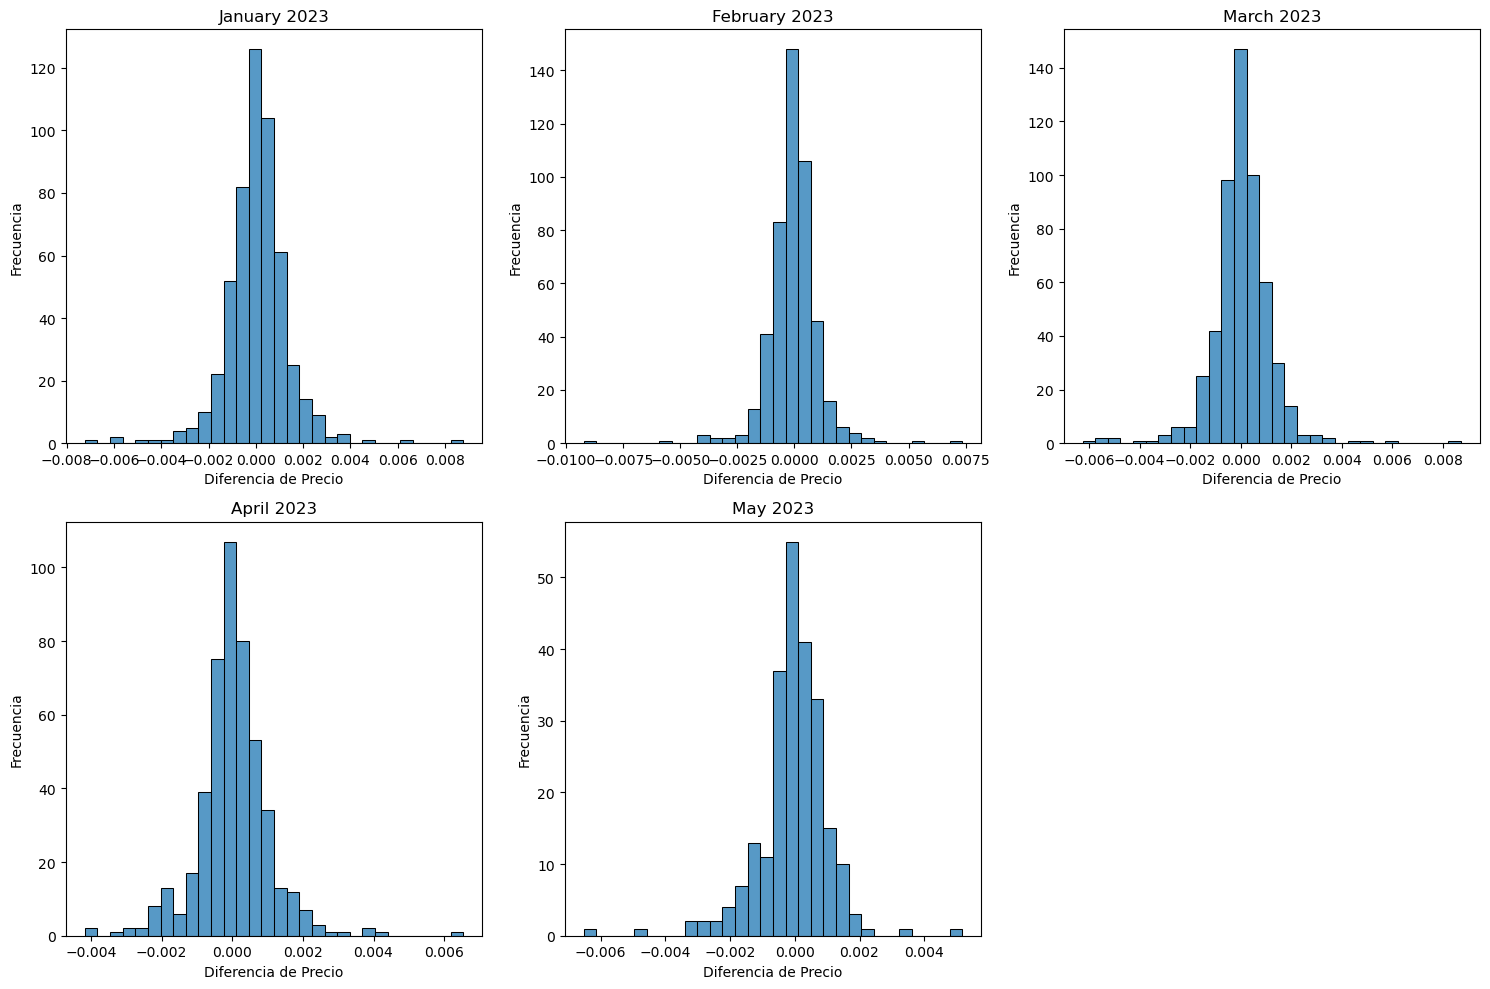

In [20]:
meses_2023 = df_2023.groupby(pd.Grouper(freq='ME'))

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  

for ax, (name, group) in zip(axes, meses_2023):
    sns.histplot(group['DiffPrice'].dropna(), bins=30, kde=False, edgecolor='black', ax=ax)
    ax.set_title(f'{name.strftime("%B %Y")}')
    ax.set_xlabel('Diferencia de Precio')
    ax.set_ylabel('Frecuencia')

for ax in axes[len(meses_2023):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

# Análisis de datos con pandas

1. Leer los datos desde una página web.


In [21]:
pip install ucimlrepo -q

Note: you may need to restart the kernel to use updated packages.


In [22]:
from ucimlrepo import fetch_ucirepo

In [23]:
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

X = breast_cancer_wisconsin_diagnostic.data.features
Y = breast_cancer_wisconsin_diagnostic.data.targets

X

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [131]:
data = pd.read_csv('https://archive.ics.uci.edu/static/public/17/data.csv')
data

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


2. Renombrar las columnas en formato PascalCase.

In [132]:
new_columns = []
for col in data.columns:
    # Dividir el nombre si hay '_' y poner mayuscula a la letra inicial
    components = col.split('_')
    new_column_name = ''.join([x.title() for x in components])
    new_columns.append(new_column_name)

data.columns = new_columns

data.columns

Index(['Id', 'Radius1', 'Texture1', 'Perimeter1', 'Area1', 'Smoothness1',
       'Compactness1', 'Concavity1', 'ConcavePoints1', 'Symmetry1',
       'FractalDimension1', 'Radius2', 'Texture2', 'Perimeter2', 'Area2',
       'Smoothness2', 'Compactness2', 'Concavity2', 'ConcavePoints2',
       'Symmetry2', 'FractalDimension2', 'Radius3', 'Texture3', 'Perimeter3',
       'Area3', 'Smoothness3', 'Compactness3', 'Concavity3', 'ConcavePoints3',
       'Symmetry3', 'FractalDimension3', 'Diagnosis'],
      dtype='object')

3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

In [133]:
data.head()

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [134]:
data.tail()

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M
568,92751,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,B


In [135]:
data.describe()

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 569 non-null    int64  
 1   Radius1            569 non-null    float64
 2   Texture1           569 non-null    float64
 3   Perimeter1         569 non-null    float64
 4   Area1              569 non-null    float64
 5   Smoothness1        569 non-null    float64
 6   Compactness1       569 non-null    float64
 7   Concavity1         569 non-null    float64
 8   ConcavePoints1     569 non-null    float64
 9   Symmetry1          569 non-null    float64
 10  FractalDimension1  569 non-null    float64
 11  Radius2            569 non-null    float64
 12  Texture2           569 non-null    float64
 13  Perimeter2         569 non-null    float64
 14  Area2              569 non-null    float64
 15  Smoothness2        569 non-null    float64
 16  Compactness2       569 non

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`. Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?


In [137]:
null_values = data.isnull().sum()

null_values

Id                   0
Radius1              0
Texture1             0
Perimeter1           0
Area1                0
Smoothness1          0
Compactness1         0
Concavity1           0
ConcavePoints1       0
Symmetry1            0
FractalDimension1    0
Radius2              0
Texture2             0
Perimeter2           0
Area2                0
Smoothness2          0
Compactness2         0
Concavity2           0
ConcavePoints2       0
Symmetry2            0
FractalDimension2    0
Radius3              0
Texture3             0
Perimeter3           0
Area3                0
Smoothness3          0
Compactness3         0
Concavity3           0
ConcavePoints3       0
Symmetry3            0
FractalDimension3    0
Diagnosis            0
dtype: int64

No se encontraron valores nulos en ninguna de las columnas del DataFrame. Los datos están completos y no es necesario aplicar ninguna estrategia para ereemplazarlos.

Si en algún momento se detectaran valores nulos en un conjunto de datos, una opción para tratarlos podría ser eliminar las filas o columnas que contengan valores nulos. Otra opción es reemplazar los valores nulos por un valor constante, como la media, mediana o moda de la columna afectada.

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente).

In [138]:
unique_values = data['Diagnosis'].unique()

unique_values

array(['M', 'B'], dtype=object)

6. Realizar un conteo de los casos etiquetados como B y M.


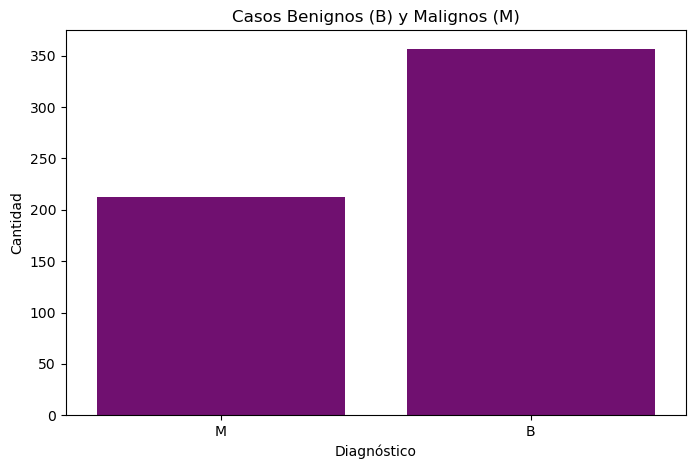

In [139]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Diagnosis', data=data, color='purple')
plt.title('Casos Benignos (B) y Malignos (M)')
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad')
plt.show()

7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).

In [140]:
data['DiagnosisNumeric'] = data['Diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
data['DiagnosisNumeric']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: DiagnosisNumeric, Length: 569, dtype: int64

8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

In [141]:
data_normalized = data.copy() 

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    data_normalized[col] = (data[col] - data[col].mean()) / data[col].std()

data_normalized

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis,DiagnosisNumeric
0,-0.236197,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,M,1.296535
1,-0.236196,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,M,1.296535
2,0.431362,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,M,1.296535
3,0.431741,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,M,1.296535
4,0.431821,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,M,1.296535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.235524,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,...,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467,M,1.296535
565,-0.235522,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,...,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122,M,1.296535
566,-0.235520,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,...,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129,M,1.296535
567,-0.235518,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,...,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684,M,1.296535


9. Agrupar características similares y calcular su promedio.

In [142]:
import re

In [143]:
averages = pd.DataFrame()

features = ['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 
            'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', 'SymmetryMean', 'FractalDimensionMean']

for feature in features:
    pattern = re.compile(rf'^{feature[:-4]}')  
    
    matching_columns = [col for col in data_normalized.columns if pattern.match(col)]
    
    averages[feature] = data_normalized[matching_columns].mean(axis=1)

averages


,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean
0,1.822892,-1.331460,2.133644,1.822793,0.886604,2.403566,1.827201,1.828182,2.037172,1.698454
1,1.377122,-0.532558,1.160448,1.512536,-0.602112,-0.536342,-0.203612,0.631241,-0.349009,-0.228767
2,1.438879,-0.115855,1.253866,1.397605,0.390527,0.982746,0.809797,1.804099,0.775643,0.032286
3,-0.241121,0.092354,-0.185181,-0.533818,2.453684,3.343920,1.573617,1.579444,4.544703,3.960995
4,1.438539,-1.135278,1.461481,1.411195,0.660750,0.059090,0.936729,1.099685,-0.412639,-0.153272
...,...,...,...,...,...,...,...,...,...,...
564,2.262762,0.303132,2.062496,2.319074,0.834796,0.045809,1.091639,2.004001,-0.936231,-0.490281
565,1.512694,2.129283,1.397014,1.502133,-0.337297,-0.160662,0.393593,0.934487,-0.312618,-0.840309
566,0.482422,1.053425,0.509009,0.395171,-0.675876,0.324159,0.294468,0.377003,-0.934205,-0.392078
567,1.651053,1.751949,1.906541,1.464675,0.926916,3.062208,2.596660,1.909844,1.459686,1.387908


10. Crear un gráfico donde se muestre el histograma de la columna RadiusMean separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

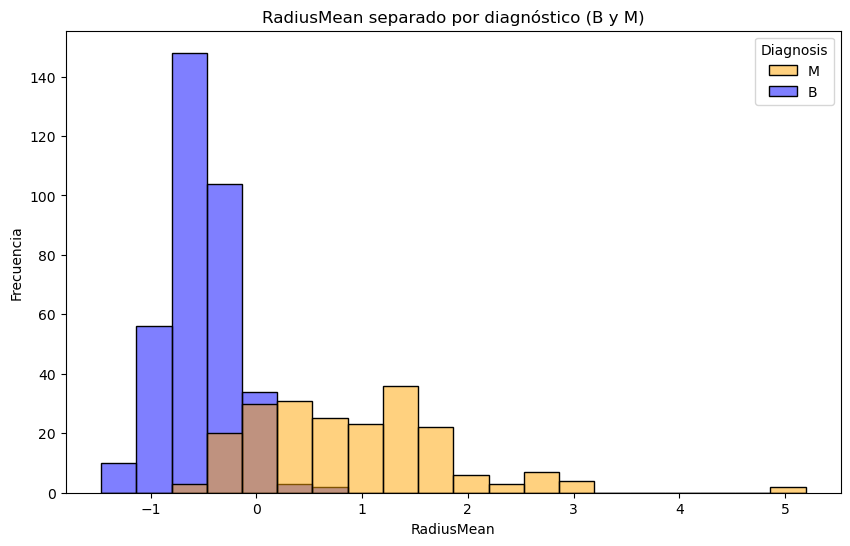

In [144]:
averages['Diagnosis'] = data['Diagnosis']

plt.figure(figsize=(10, 6))
sns.histplot(data=averages, x='RadiusMean', hue='Diagnosis', palette={'M': 'orange', 'B': 'blue'}, bins=20, kde=False)

plt.title('RadiusMean separado por diagnóstico (B y M)')
plt.xlabel('RadiusMean')
plt.ylabel('Frecuencia')

plt.show()

11. Generar gráficos de violín para múltiples características. Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`


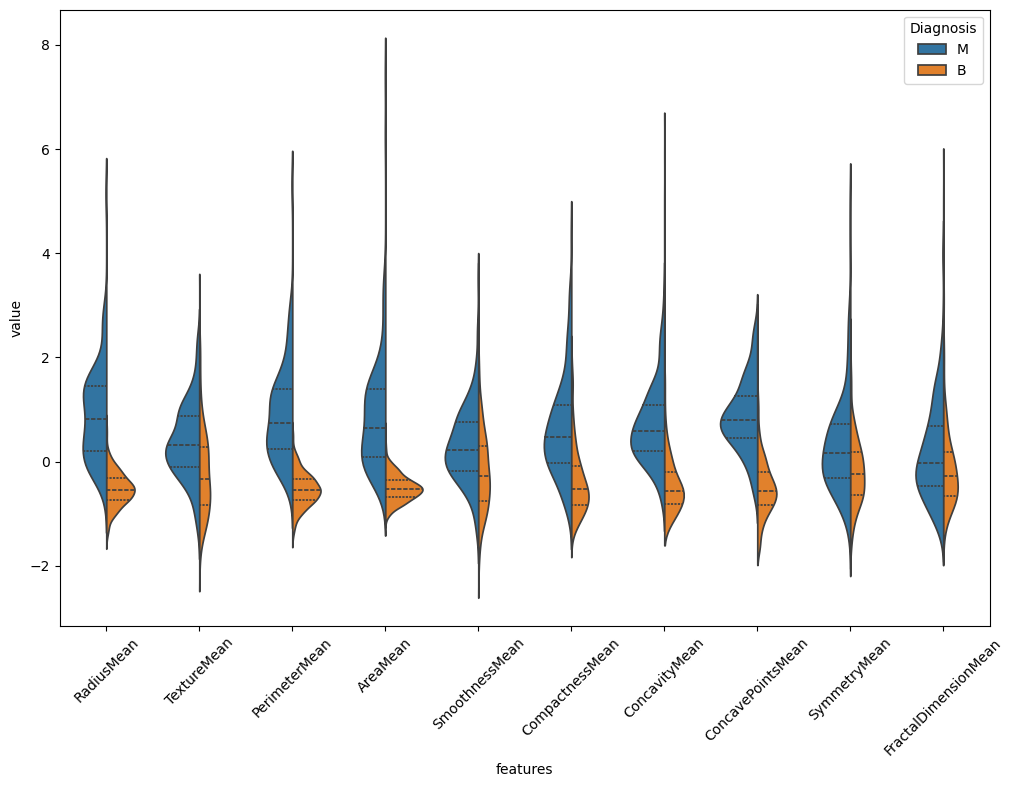

In [145]:
data_melt = pd.melt(averages, id_vars="Diagnosis", var_name="features", value_name="value")

plt.figure(figsize=(12, 8))
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data_melt, split=True, inner="quart")
plt.xticks(rotation=45)
plt.show()

12. Determinar y eliminar los valores atípicos (outliers) en la columna RadiusMean.



<Figure size 1800x600 with 0 Axes>

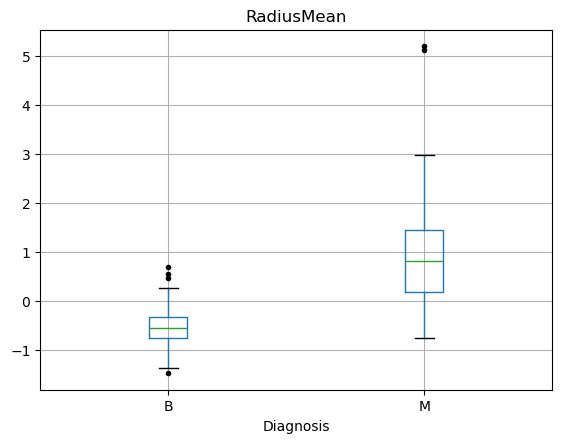

In [146]:
plt.figure(figsize=(18, 6))
averages.boxplot(column="RadiusMean", by='Diagnosis', sym='k.')
plt.suptitle("") 
plt.show()

In [147]:
z_scores = np.abs(stats.zscore(averages['RadiusMean']))
data_zscore_cleaned = averages[z_scores < 3]

print(f"Valores originales: {len(averages['RadiusMean'])}")
print(f"Valores después de eliminar outliers con Z-score: {len(data_zscore_cleaned)}")

Valores originales: 569
Valores después de eliminar outliers con Z-score: 563


13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

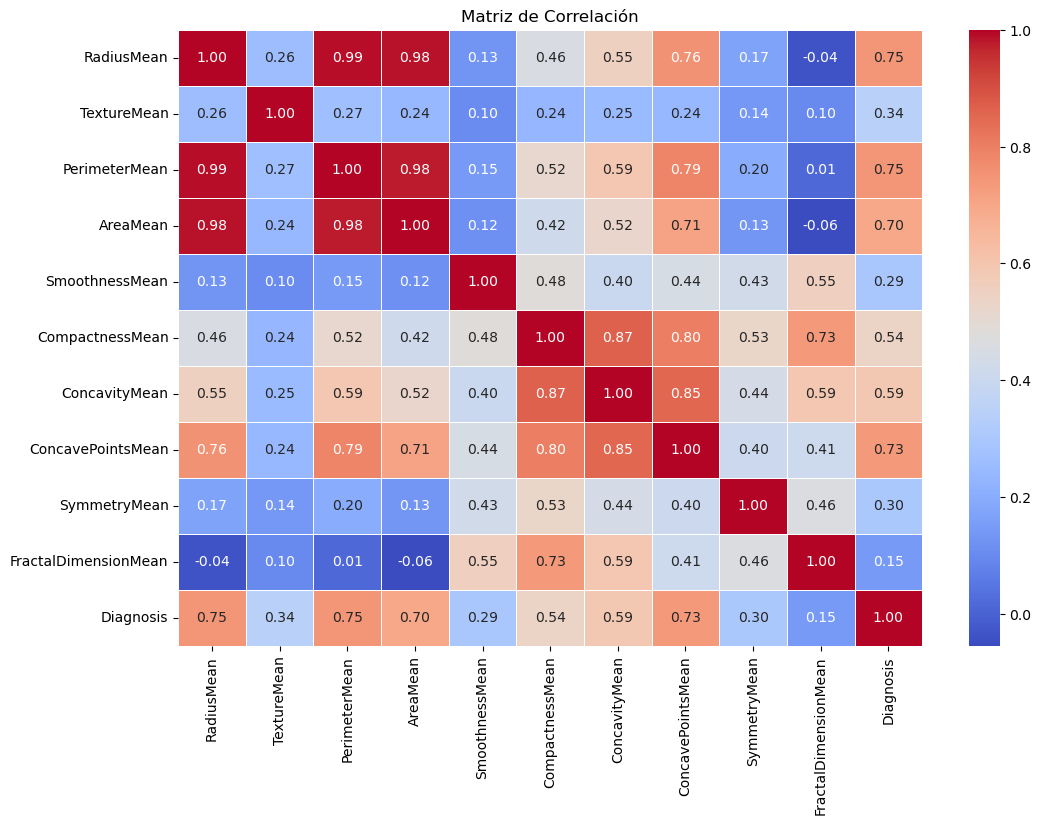

In [148]:
averages['Diagnosis'] = data['DiagnosisNumeric']
correlation_matrix = averages.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Matriz de Correlación')
plt.show()

14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?

Los histogramas junto con ajustes de distribución permiten observar la forma de las distribuciones y descubrir qué modelo estadístico se ajusta mejor a los datos. 

2024-10-01 08:57:02.574 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=2.208301)
2024-10-01 08:57:02.592 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=1.041061)
2024-10-01 08:57:02.634 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=0.77917)
2024-10-01 08:57:02.716 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted beta distribution with error=1.069844)
2024-10-01 08:57:02.825 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted burr distribution with error=0.602417)


Text(0.5, 0, 'RadiusMean')

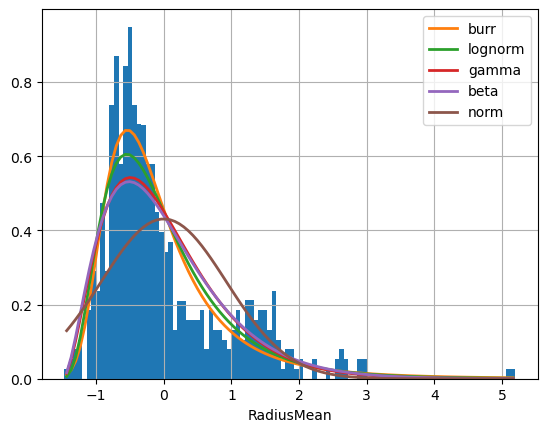

In [149]:

f = Fitter(averages.RadiusMean,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]


plt.xlabel('RadiusMean')


Como tenemos datos indexados por tiempo, podemos hacer gráficos que muestren cómo las variables cambian a lo largo del tiempo.

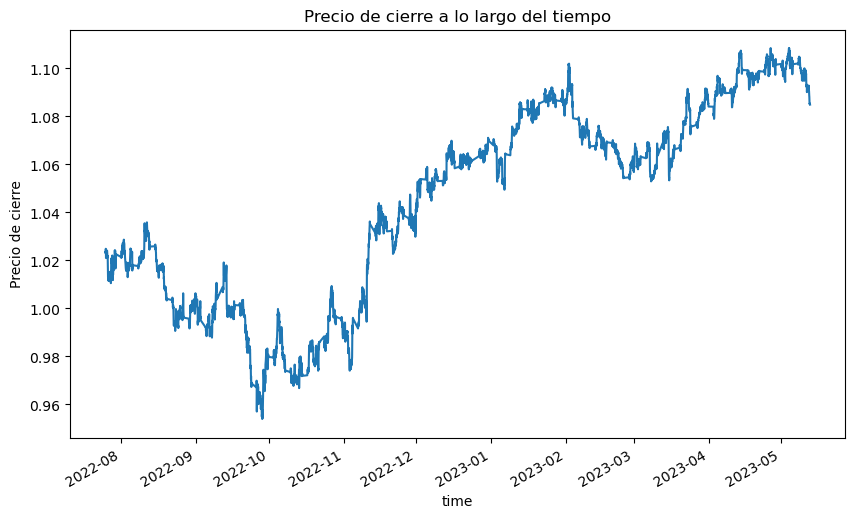

In [150]:
df['Close'].plot(figsize=(10, 6), title='Precio de cierre a lo largo del tiempo')
plt.ylabel('Precio de cierre')
plt.show()


También podemos graficar una media móvil para suavizar las fluctuaciones y resaltar las tendencias.

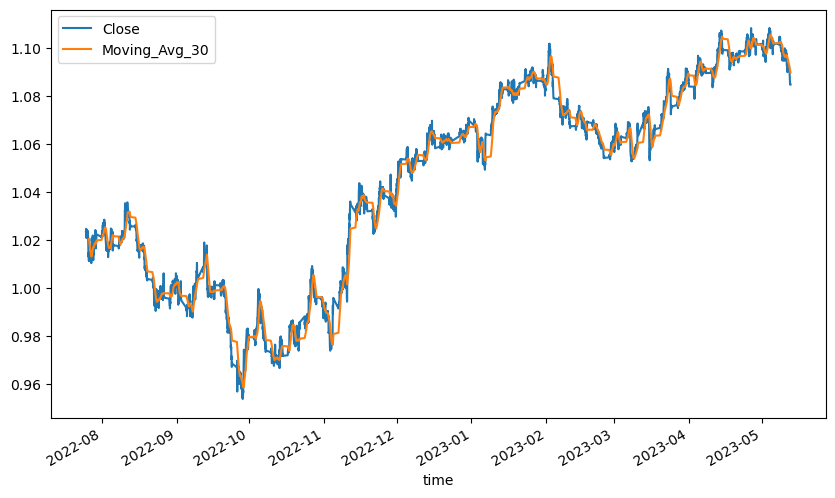

In [151]:
df['Moving_Avg_30'] = df['Close'].rolling(window=30).mean()
df[['Close', 'Moving_Avg_30']].plot(figsize=(10, 6))
plt.show()


Para observar la dispersión y detectar valores atípicos se pueden hacer boxplots.

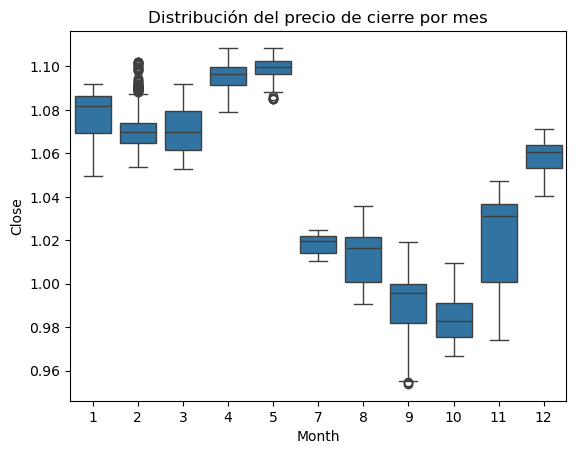

In [152]:
df['Month'] = df.index.month
sns.boxplot(x='Month', y='Close', data=df)
plt.title('Distribución del precio de cierre por mes')
plt.show()
